### Import libraries 

In [1]:
from APES import *
from time import time
from matplotlib import font_manager
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input,Dense
from keras.models import Model,load_model
%matplotlib inline
ticks_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=15, weight='normal', stretch='normal')
legend_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=12, weight='normal', stretch='normal')
hfont =  {'fontname':'helvetica-light-587ebe5a59211'}
csfont = {'fontname':'helvetica-light-587ebe5a59211'}
def calculate(val,index):
    mean = np.mean(val[:,index,:],axis=0)
    std = np.std(val[:,index,:],axis=0)
    return mean,std/np.sqrt(20)

def Prepare_model(mod=1336):
    x = load_model('output/{}/MOD/model.h5'.format(mod))
    nm = Model(inputs=[x.layers[i].input for i in [0,3]],
               outputs=[x.layers[i].output for i in [2,4,5,6,7,8,9]])
    return nm

def Get_dataset(Ego=False):
    if Ego:
        unique_count=26400
    else:
        unique_count=31200
    all_simu = np.load('NPZ/in_out_{}_seq_EGO_{}.npz'.format(unique_count,Ego))

    data = all_simu['input_target']
    action_sequence = all_simu['action_sequence']

    if Ego:
        cnn_input = data[:,:693]
        rest_input = data[:,693:697]
        y = data[:,697]
        cnn_input = cnn_input.reshape((data.shape[0],11,21,3))
        rest_input = rest_input.reshape((data.shape[0],4))

        conv_size=(11,21,3,)
        rest_size=(4,)

    else:
        cnn_input = data[:,:676]
        rest_input = data[:,676:684]
        y = data[:,684]
        cnn_input = cnn_input.reshape((data.shape[0],13,13,4))
        rest_input = rest_input.reshape((data.shape[0],8))

        conv_size=(13,13,4,)
        rest_size=(8,)
    
    y = y.reshape((data.shape[0],1))
    naction =  Settings.PossibleActions.shape[0]
    return cnn_input,rest_input,y,conv_size,rest_size,naction

Using TensorFlow backend.
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

<h3>Best models allo/ego with allo/ego actions</h3>
<table align="left">
  <tr>
    <th>Actions\Vision</th>
    <th>Allo</th>
    <th>Ego</th>
  </tr>
  <tr>
    <th>Allo</th>
    <td>1336</td>
    <td>1440</td>
  </tr>
  <tr>
    <th>Ego</th>
    <td>1420</td>
    <td>1358</td>
  </tr>
</table>

#### Ego actions are :0: Forward, 1:Backword, 2:Right, 3:left,4:nothing
#### Allo actions are :0: North, 1:South, 2:West, 3:East, 4:nothing

In [2]:
cnn_input,rest_input,y,conv_size,rest_size,naction = Get_dataset(Ego=False)
print(cnn_input.shape,rest_input.shape,y.shape)
print(conv_size,naction,rest_size)

(31200, 13, 13, 4) (31200, 8) (31200, 1)
(13, 13, 4) 5 (8,)


In [3]:
nm = Prepare_model(1336)

/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [21]:
inputt = np.zeros((cnn_input.shape[0],100,13,13,4),dtype=np.int8)
restt = np.zeros((cnn_input.shape[0],100,8),dtype=np.int8)

In [22]:
inputt[:,0] = cnn_input
restt[:,0] = rest_input

In [24]:
inputt.shape

(31200, 100, 13, 13, 4)

In [ ]:
tmp = nm.predict_on_batch([inputt,restt])

In [ ]:
np.savez('activations_model:{}.npz',flatten=tmp[0],merge=tmp[1],FC_1=tmp[2],FC_2=tmp[3],
         LSTM = tmp[4],FC_3=tmp[5],output=tmp[6])

In [20]:
for i in range(100):
    print(np.sum(tmp[0][0,i]))

42.00963
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734
16.317734


# Classifires

In [3]:
from keras.layers import Input,convolutional,Flatten,merge,Dense
from keras.models import load_model,Model
from APES import *
from time import time

def createLayers(insize,in_conv,naction):
    c = Input(shape=in_conv)
    con_process = c
    con_process = convolutional.Conv2D(filters=6,kernel_size=(3,3),activation="relu",padding="same",strides=1)(con_process)
    con_process = Flatten()(con_process)
    x = Input(shape=insize)#env.observation_space.shape)
    h = merge([con_process,x],mode="concat")
    h = Dense(32, activation='tanh')(h)
    h = Dense(32, activation='tanh')(h)
    z = Dense(1, activation='sigmoid')(h)
    return c,x, z

Using TensorFlow backend.
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

### Classify Allocentric

In [6]:
num_exper= 20
epochs=20
info = np.zeros((num_exper,4,epochs))
for i in range(num_exper):
    c,x,z = createLayers(rest_size,conv_size,naction)

    allo_classifier = Model(inputs=[c,x],outputs=z)

    allo_classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    allo_classifier.summary()

    allo_history = allo_classifier.fit([cnn_input,rest_input],
                                       y,epochs=epochs,batch_size=64,validation_split=0.2)
    
    info[i,0,:] = allo_history.history['val_loss']
    info[i,1,:] = allo_history.history['val_acc']
    info[i,2,:] = allo_history.history['loss']
    info[i,3,:] = allo_history.history['acc']

/gpfs/hpc/home/labash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  if sys.path[0] == '':
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 13, 13, 4)     0                                            
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 13, 13, 6)     222         input_3[0][0]                    
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 1014)          0           conv2d_2[0][0]                   
____________________________________________________________________________________________________
input_4 (InputLayer)             (None, 8)             0                                            
___________________________________________________________________________________________

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 5s - loss: 0.6815 - acc: 0.5813 - val_loss: 0.6780 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 4s - loss: 0.6601 - acc: 0.6047 - val_loss: 0.5841 - val_acc: 0.7478
Epoch 3/20
24960/24960 [==============================] - 4s - loss: 0.3230 - acc: 0.9017 - val_loss: 0.1485 - val_acc: 0.9803
Epoch 4/20
24960/24960 [==============================] - 3s - loss: 0.0857 - acc: 0.9933 - val_loss: 0.0527 - val_acc: 0.9981
Epoch 5/20
24960/24960 [==============================] - 3s - loss: 0.0332 - acc: 0.9998 - val_loss: 0.0236 - val_acc: 1.0000
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.0160 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 7/20
24960/24960 [==============================] - 3s - loss: 0.0089 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 3s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 4s - loss: 0.6815 - acc: 0.5792 - val_loss: 0.6799 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 3s - loss: 0.5353 - acc: 0.7453 - val_loss: 0.2874 - val_acc: 0.9345
Epoch 3/20
24960/24960 [==============================] - 3s - loss: 0.1686 - acc: 0.9729 - val_loss: 0.0998 - val_acc: 0.9899
Epoch 4/20
24960/24960 [==============================] - 3s - loss: 0.0634 - acc: 0.9951 - val_loss: 0.0437 - val_acc: 0.9982
Epoch 5/20
24960/24960 [==============================] - 3s - loss: 0.0270 - acc: 0.9998 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 6/20
24960/24960 [==============================] - 4s - loss: 0.0130 - acc: 1.0000 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 7/20
24960/24960 [==============================] - 3s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 3s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 4s - loss: 0.6817 - acc: 0.5824 - val_loss: 0.6817 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 3s - loss: 0.6530 - acc: 0.6220 - val_loss: 0.5453 - val_acc: 0.7572
Epoch 3/20
24960/24960 [==============================] - 3s - loss: 0.3714 - acc: 0.8517 - val_loss: 0.2016 - val_acc: 0.9522
Epoch 4/20
24960/24960 [==============================] - 3s - loss: 0.1234 - acc: 0.9865 - val_loss: 0.0829 - val_acc: 0.9971
Epoch 5/20
24960/24960 [==============================] - 3s - loss: 0.0538 - acc: 0.9986 - val_loss: 0.0446 - val_acc: 1.0000
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.0265 - acc: 0.9998 - val_loss: 0.0203 - val_acc: 0.9994
Epoch 7/20
24960/24960 [==============================] - 3s - loss: 0.0144 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 3s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 4s - loss: 0.6750 - acc: 0.5905 - val_loss: 0.6194 - val_acc: 0.6869
Epoch 2/20
24960/24960 [==============================] - 3s - loss: 0.5094 - acc: 0.7586 - val_loss: 0.3958 - val_acc: 0.8192
Epoch 3/20
24960/24960 [==============================] - 3s - loss: 0.2076 - acc: 0.9510 - val_loss: 0.1124 - val_acc: 0.9889
Epoch 4/20
24960/24960 [==============================] - 3s - loss: 0.0717 - acc: 0.9965 - val_loss: 0.0476 - val_acc: 0.9981
Epoch 5/20
24960/24960 [==============================] - 3s - loss: 0.0337 - acc: 0.9994 - val_loss: 0.0252 - val_acc: 0.9987
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.0181 - acc: 0.9998 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 7/20
24960/24960 [==============================] - 3s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 4s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 5s - loss: 0.6822 - acc: 0.5813 - val_loss: 0.6822 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 3s - loss: 0.6774 - acc: 0.5851 - val_loss: 0.6483 - val_acc: 0.6752
Epoch 3/20
24960/24960 [==============================] - 4s - loss: 0.4328 - acc: 0.8243 - val_loss: 0.2233 - val_acc: 0.9688
Epoch 4/20
24960/24960 [==============================] - 4s - loss: 0.1227 - acc: 0.9921 - val_loss: 0.0671 - val_acc: 1.0000
Epoch 5/20
24960/24960 [==============================] - 5s - loss: 0.0405 - acc: 0.9998 - val_loss: 0.0268 - val_acc: 1.0000
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.0172 - acc: 1.0000 - val_loss: 0.0123 - val_acc: 1.0000
Epoch 7/20
24960/24960 [==============================] - 4s - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 4s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 5s - loss: 0.6808 - acc: 0.5828 - val_loss: 0.6799 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 3s - loss: 0.6776 - acc: 0.5840 - val_loss: 0.6752 - val_acc: 0.5806
Epoch 3/20
24960/24960 [==============================] - 4s - loss: 0.6092 - acc: 0.6643 - val_loss: 0.5062 - val_acc: 0.7429
Epoch 4/20
24960/24960 [==============================] - 4s - loss: 0.4054 - acc: 0.8199 - val_loss: 0.2422 - val_acc: 0.9361
Epoch 5/20
24960/24960 [==============================] - 4s - loss: 0.1410 - acc: 0.9683 - val_loss: 0.0904 - val_acc: 0.9840
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.0590 - acc: 0.9922 - val_loss: 0.0417 - val_acc: 0.9966
Epoch 7/20
24960/24960 [==============================] - 4s - loss: 0.0286 - acc: 0.9991 - val_loss: 0.0220 - val_acc: 0.9994
Epoch 8/20
24960/24960 [==============================] - 3s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 5s - loss: 0.6812 - acc: 0.5829 - val_loss: 0.6805 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 3s - loss: 0.6808 - acc: 0.5840 - val_loss: 0.6808 - val_acc: 0.5806
Epoch 3/20
24960/24960 [==============================] - 3s - loss: 0.6797 - acc: 0.5840 - val_loss: 0.6814 - val_acc: 0.5806
Epoch 4/20
24960/24960 [==============================] - 3s - loss: 0.6798 - acc: 0.5840 - val_loss: 0.6806 - val_acc: 0.5806
Epoch 5/20
24960/24960 [==============================] - 3s - loss: 0.6796 - acc: 0.5840 - val_loss: 0.6801 - val_acc: 0.5806
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.6794 - acc: 0.5840 - val_loss: 0.6807 - val_acc: 0.5806
Epoch 7/20
24960/24960 [==============================] - 3s - loss: 0.6801 - acc: 0.5840 - val_loss: 0.6813 - val_acc: 0.5806
Epoch 8/20
24960/24960 [==============================] - 3s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 5s - loss: 0.6814 - acc: 0.5803 - val_loss: 0.6766 - val_acc: 0.5806
Epoch 2/20
24960/24960 [==============================] - 4s - loss: 0.4696 - acc: 0.7888 - val_loss: 0.2341 - val_acc: 0.9620
Epoch 3/20
24960/24960 [==============================] - 3s - loss: 0.1414 - acc: 0.9860 - val_loss: 0.0837 - val_acc: 0.9981
Epoch 4/20
24960/24960 [==============================] - 4s - loss: 0.0556 - acc: 0.9995 - val_loss: 0.0345 - val_acc: 1.0000
Epoch 5/20
24960/24960 [==============================] - 4s - loss: 0.0246 - acc: 1.0000 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 6/20
24960/24960 [==============================] - 4s - loss: 0.0122 - acc: 1.0000 - val_loss: 0.0092 - val_acc: 1.0000
Epoch 7/20
24960/24960 [==============================] - 4s - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 4s -

Train on 24960 samples, validate on 6240 samples
Epoch 1/20
24960/24960 [==============================] - 5s - loss: 0.6771 - acc: 0.5818 - val_loss: 0.6389 - val_acc: 0.6595
Epoch 2/20
24960/24960 [==============================] - 4s - loss: 0.4825 - acc: 0.7621 - val_loss: 0.3488 - val_acc: 0.8804
Epoch 3/20
24960/24960 [==============================] - 3s - loss: 0.1958 - acc: 0.9541 - val_loss: 0.1060 - val_acc: 0.9904
Epoch 4/20
24960/24960 [==============================] - 4s - loss: 0.0603 - acc: 0.9981 - val_loss: 0.0386 - val_acc: 1.0000
Epoch 5/20
24960/24960 [==============================] - 4s - loss: 0.0226 - acc: 1.0000 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 6/20
24960/24960 [==============================] - 3s - loss: 0.0105 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 7/20
24960/24960 [==============================] - 3s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 8/20
24960/24960 [==============================] - 3s -

### Ego centric decision

In [11]:
cnn_input,rest_input,y,conv_size,rest_size = Get_dataset(Ego=True)
print(cnn_input.shape,rest_input.shape,y.shape)
print(conv_size,naction,rest_size)

(26400, 11, 21, 3) (26400, 4) (26400, 1)
(11, 21, 3) 5 (4,)


In [13]:
ego_info = np.zeros((num_exper,4,epochs))
for i in range(num_exper):
    c,x,z = createLayers(rest_size,conv_size,naction)

    ego_classifier = Model(inputs=[c,x],outputs=z)

    ego_classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    ego_classifier.summary()

    ego_history = ego_classifier.fit([cnn_input,rest_input],
                                       y,epochs=epochs,batch_size=64,validation_split=0.2)
    
    ego_info[i,0,:] = ego_history.history['val_loss']
    ego_info[i,1,:] = ego_history.history['val_acc']
    ego_info[i,2,:] = ego_history.history['loss']
    ego_info[i,3,:] = ego_history.history['acc']

/gpfs/hpc/home/labash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  if sys.path[0] == '':
/gpfs/hpc/home/labash/miniconda3/envs/PT_old/lib/python3.6/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_45 (InputLayer)            (None, 11, 21, 3)     0                                            
____________________________________________________________________________________________________
conv2d_23 (Conv2D)               (None, 11, 21, 6)     168         input_45[0][0]                   
____________________________________________________________________________________________________
flatten_23 (Flatten)             (None, 1386)          0           conv2d_23[0][0]                  
____________________________________________________________________________________________________
input_46 (InputLayer)            (None, 4)             0                                            
___________________________________________________________________________________________

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6817 - acc: 0.5817 - val_loss: 0.6803 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 3s - loss: 0.6803 - acc: 0.5831 - val_loss: 0.6798 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 3s - loss: 0.6798 - acc: 0.5831 - val_loss: 0.6794 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 3s - loss: 0.6796 - acc: 0.5831 - val_loss: 0.6791 - val_acc: 0.5841
Epoch 5/20
21120/21120 [==============================] - 4s - loss: 0.6556 - acc: 0.6187 - val_loss: 0.5598 - val_acc: 0.7519
Epoch 6/20
21120/21120 [==============================] - 3s - loss: 0.4983 - acc: 0.7437 - val_loss: 0.4286 - val_acc: 0.7742
Epoch 7/20
21120/21120 [==============================] - 3s - loss: 0.4037 - acc: 0.7729 - val_loss: 0.3819 - val_acc: 0.7866
Epoch 8/20
21120/21120 [==============================] - 3s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 4s - loss: 0.6855 - acc: 0.5764 - val_loss: 0.6819 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 3s - loss: 0.6815 - acc: 0.5823 - val_loss: 0.6802 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 4s - loss: 0.6808 - acc: 0.5831 - val_loss: 0.6794 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 3s - loss: 0.6804 - acc: 0.5831 - val_loss: 0.6791 - val_acc: 0.5841
Epoch 5/20
21120/21120 [==============================] - 3s - loss: 0.6802 - acc: 0.5831 - val_loss: 0.6791 - val_acc: 0.5841
Epoch 6/20
21120/21120 [==============================] - 3s - loss: 0.6798 - acc: 0.5831 - val_loss: 0.6794 - val_acc: 0.5841
Epoch 7/20
21120/21120 [==============================] - 3s - loss: 0.6799 - acc: 0.5831 - val_loss: 0.6791 - val_acc: 0.5841
Epoch 8/20
21120/21120 [==============================] - 3s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6830 - acc: 0.5779 - val_loss: 0.6840 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 4s - loss: 0.6808 - acc: 0.5831 - val_loss: 0.6801 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 4s - loss: 0.6805 - acc: 0.5831 - val_loss: 0.6793 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 4s - loss: 0.6806 - acc: 0.5831 - val_loss: 0.6801 - val_acc: 0.5841
Epoch 5/20
21120/21120 [==============================] - 3s - loss: 0.6804 - acc: 0.5831 - val_loss: 0.6790 - val_acc: 0.5841
Epoch 6/20
21120/21120 [==============================] - 3s - loss: 0.6799 - acc: 0.5831 - val_loss: 0.6805 - val_acc: 0.5841
Epoch 7/20
21120/21120 [==============================] - 4s - loss: 0.6797 - acc: 0.5831 - val_loss: 0.6792 - val_acc: 0.5841
Epoch 8/20
21120/21120 [==============================] - 3s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6821 - acc: 0.5775 - val_loss: 0.6805 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 3s - loss: 0.6798 - acc: 0.5831 - val_loss: 0.6797 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 4s - loss: 0.6795 - acc: 0.5831 - val_loss: 0.6779 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 4s - loss: 0.6190 - acc: 0.6655 - val_loss: 0.5266 - val_acc: 0.7515
Epoch 5/20
21120/21120 [==============================] - 4s - loss: 0.4483 - acc: 0.7693 - val_loss: 0.3874 - val_acc: 0.7881
Epoch 6/20
21120/21120 [==============================] - 4s - loss: 0.3069 - acc: 0.8736 - val_loss: 0.2257 - val_acc: 0.9210
Epoch 7/20
21120/21120 [==============================] - 4s - loss: 0.1494 - acc: 0.9667 - val_loss: 0.0967 - val_acc: 0.9867
Epoch 8/20
21120/21120 [==============================] - 4s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6821 - acc: 0.5799 - val_loss: 0.6796 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 3s - loss: 0.6795 - acc: 0.5831 - val_loss: 0.6794 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 3s - loss: 0.6785 - acc: 0.5831 - val_loss: 0.6773 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 3s - loss: 0.6729 - acc: 0.5831 - val_loss: 0.6741 - val_acc: 0.5841
Epoch 5/20
21120/21120 [==============================] - 3s - loss: 0.6684 - acc: 0.5812 - val_loss: 0.6760 - val_acc: 0.5841
Epoch 6/20
21120/21120 [==============================] - 3s - loss: 0.6657 - acc: 0.5806 - val_loss: 0.6725 - val_acc: 0.5841
Epoch 7/20
21120/21120 [==============================] - 3s - loss: 0.6642 - acc: 0.5798 - val_loss: 0.6734 - val_acc: 0.5841
Epoch 8/20
21120/21120 [==============================] - 4s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6828 - acc: 0.5789 - val_loss: 0.6809 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 4s - loss: 0.6808 - acc: 0.5831 - val_loss: 0.6809 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 4s - loss: 0.6798 - acc: 0.5831 - val_loss: 0.6799 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 4s - loss: 0.6771 - acc: 0.5837 - val_loss: 0.6594 - val_acc: 0.5987
Epoch 5/20
21120/21120 [==============================] - 4s - loss: 0.5709 - acc: 0.7064 - val_loss: 0.4957 - val_acc: 0.7339
Epoch 6/20
21120/21120 [==============================] - 4s - loss: 0.4333 - acc: 0.7652 - val_loss: 0.3965 - val_acc: 0.7816
Epoch 7/20
21120/21120 [==============================] - 4s - loss: 0.3779 - acc: 0.7816 - val_loss: 0.3624 - val_acc: 0.7877
Epoch 8/20
21120/21120 [==============================] - 3s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6818 - acc: 0.5823 - val_loss: 0.6799 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 3s - loss: 0.6800 - acc: 0.5831 - val_loss: 0.6793 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 4s - loss: 0.6794 - acc: 0.5831 - val_loss: 0.6794 - val_acc: 0.5841
Epoch 4/20
21120/21120 [==============================] - 4s - loss: 0.6795 - acc: 0.5831 - val_loss: 0.6791 - val_acc: 0.5841
Epoch 5/20
21120/21120 [==============================] - 4s - loss: 0.6791 - acc: 0.5831 - val_loss: 0.6786 - val_acc: 0.5841
Epoch 6/20
21120/21120 [==============================] - 3s - loss: 0.6766 - acc: 0.5831 - val_loss: 0.6754 - val_acc: 0.5841
Epoch 7/20
21120/21120 [==============================] - 3s - loss: 0.6707 - acc: 0.5815 - val_loss: 0.6740 - val_acc: 0.5841
Epoch 8/20
21120/21120 [==============================] - 3s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6825 - acc: 0.5808 - val_loss: 0.6801 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 4s - loss: 0.6802 - acc: 0.5831 - val_loss: 0.6788 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 4s - loss: 0.6144 - acc: 0.6624 - val_loss: 0.4902 - val_acc: 0.7534
Epoch 4/20
21120/21120 [==============================] - 4s - loss: 0.4182 - acc: 0.7807 - val_loss: 0.3723 - val_acc: 0.8121
Epoch 5/20
21120/21120 [==============================] - 3s - loss: 0.3483 - acc: 0.8327 - val_loss: 0.2982 - val_acc: 0.8771
Epoch 6/20
21120/21120 [==============================] - 4s - loss: 0.2234 - acc: 0.9181 - val_loss: 0.1543 - val_acc: 0.9581
Epoch 7/20
21120/21120 [==============================] - 4s - loss: 0.1143 - acc: 0.9731 - val_loss: 0.0795 - val_acc: 0.9920
Epoch 8/20
21120/21120 [==============================] - 4s -

Train on 21120 samples, validate on 5280 samples
Epoch 1/20
21120/21120 [==============================] - 5s - loss: 0.6820 - acc: 0.5808 - val_loss: 0.6799 - val_acc: 0.5841
Epoch 2/20
21120/21120 [==============================] - 3s - loss: 0.6796 - acc: 0.5831 - val_loss: 0.6799 - val_acc: 0.5841
Epoch 3/20
21120/21120 [==============================] - 3s - loss: 0.6678 - acc: 0.5992 - val_loss: 0.5929 - val_acc: 0.7364
Epoch 4/20
21120/21120 [==============================] - 3s - loss: 0.4781 - acc: 0.7588 - val_loss: 0.3897 - val_acc: 0.7985
Epoch 5/20
21120/21120 [==============================] - 3s - loss: 0.3720 - acc: 0.7938 - val_loss: 0.3546 - val_acc: 0.8172
Epoch 6/20
21120/21120 [==============================] - 3s - loss: 0.3223 - acc: 0.8420 - val_loss: 0.2797 - val_acc: 0.8735
Epoch 7/20
21120/21120 [==============================] - 4s - loss: 0.2169 - acc: 0.9189 - val_loss: 0.1624 - val_acc: 0.9536
Epoch 8/20
21120/21120 [==============================] - 4s -

In [14]:
y.shape

(26400, 1)

In [15]:
np.savez('val_train_acc_loss_E.npz',allo=info,ego=ego_info)

### Plot

In [16]:
from APES import *
from time import time
from matplotlib import font_manager
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ticks_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=15, weight='normal', stretch='normal')
legend_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=12, weight='normal', stretch='normal')
hfont =  {'fontname':'helvetica-light-587ebe5a59211'}
csfont = {'fontname':'helvetica-light-587ebe5a59211'}
def calculate(val,index):
    mean = np.mean(val[:,index,:],axis=0)
    std = np.std(val[:,index,:],axis=0)
    return mean,std/np.sqrt(20)

In [17]:
info = np.load('val_train_acc_loss_E.npz')
ego_info = info['ego']
info = info['allo']

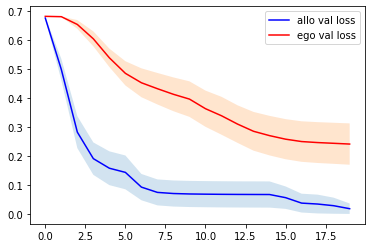

In [18]:
avlm,avls = calculate(info,0)
evlm,evls = calculate(ego_info,0)
plt.plot(avlm,color='b',label='allo val loss')
plt.fill_between(np.arange(20),avlm+avls,avlm-avls,alpha=0.2)

plt.plot(evlm,color='r',label='ego val loss')
plt.fill_between(np.arange(20),evlm+evls,evlm-evls,alpha=0.2)
#plt.ylabel('loss')
#plt.xlabel('Epoch')
plt.legend()

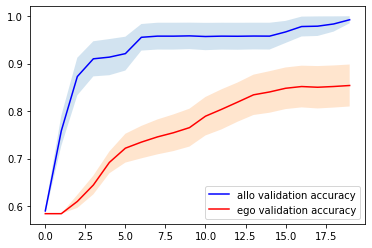

In [19]:
avam,avas = calculate(info,1)
evam,evas = calculate(ego_info,1)
plt.plot(avam,color='b',label='allo validation accuracy')
plt.fill_between(np.arange(20),avam+avas,avam-avas,alpha=0.2)
plt.plot(evam,color='r',label='ego validation accuracy')
plt.fill_between(np.arange(20),evam+evas,evam-evas,alpha=0.2)
atam,avas = calculate(info,3)
etam,evas = calculate(ego_info,3)
#plt.plot(atam,color='black',label='allo training accuracy')

#plt.plot(etam,color='r',label='ego training accuracy')

plt.legend()